# Space Station Design Lab
## PH 211 COCC
### Bruce Emerson 2/20/2021

This notebook is meant to provide tools and discussion to support data analysis and presentation as you generate your lab reports. 

[Space Station](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211Labspacestation.html) and [Sandbox Lab Discussion](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabDspacestation.html)

There are two features to this lab beyond merely an exploration of circular motion concepts. One of these is the design experience which is to say the search for a solution problem which meets certain constraints and the other is realizing that you can build a host of different paths towards that solution depending on what makes sense to you.


As you will see from the lab statement above the core idea is to determine the size and rotation rate of a space colony (of the trash can variety) that meets a number of criteria. I won't repeat them here.


## Dependencies

This is where we load in the various libraries of python tools that are needed for the particular work we are undertaking.  
  
```numpy``` is a numerical tools library - often imported as np. ```numpy``` also contains the statistical tools that we will use in this lab. There are other libraries dedicated to statistical tools but 'numpy' has everything we need.  
```matplotlib.pyplot``` is often imported as ```plt``` to make it easier to use. ```matplotlib``` has the plotting tools that we need for this lab. 


The following code cell will need to be run first before any other code cells.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

### The simple physics model...

Because this is a circular motion problem and all such problems are a particular case of a Newton's Law problem we start with a freebody diagram. As you do this stop and think what it means when your body 'feels' a force of 1g. As we have discussed in class the force of gravity is pretty much undectable through our senses. The other forces that act on us because of gravity are what we 'feel'!

The basic tool for circular motion is:  

.$$\large \sum_{all} F_{radial} = m\frac{v^2}{r}$$

### The Criteria:

- 1:'weight' must be 'earth normal' on 'ground'.
- 2: 20 m 'above the ground' weight must be no less than 95% of 'earth normal'.
- 3: Total area that satisfies 1: must be $0.8\: km^2$.
- 4: Period of rotation must be greater than 30 s.
- 5: Space colony located at L4 or L5 in earth - moon system


### Your Drawing

One of the first deliverables is to include a drawing of your space station design. You can draw this out on paper and take a picture or create a drawing in some software and export that as an image. In either case it is advisable to create an images folder inside the folder where you keep your Jupyterlab notebooks. You then embed the image in your markdown cell using this command

```<img src="images/spacestation.jpg" width="400" height="400" />```

This command assumes the that 'images' folder is in the same folder as your notebook. You can control either the width or height of the image as presented but this does NOT distort the image. The aspect ratio (width/height) of your image is unaffected.

<img src="images/spacestation.jpg" width="400" height="400" />

By Rick Guidice - NASA Ames Research Center
http://settlement.arc.nasa.gov/70sArtHiRes/70sArt/art.html, Public Domain, https://commons.wikimedia.org/w/index.php?curid=26938951

***
## Lab Deliverable:

After you have completed your exploration and design of the space station return to the cell above and embed an image of your design. Be sure that you have labeled all relevant parameters as you intend. 

**NOTE:** I have made a change to the exporting guidelines that is needed so that embedded images like these are properly transfered to the html file and from there to the pdf. To access these changes you will need to install some tools. The are the directions for [installing the needed Jupyterlab tools](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Learning/PH211Software/Jupyter/PH211JupyterNBextensions.html)

***

### Lagrange Points:

In a gravitational system with two massive objects and one much smaller object there are a number of places where the collective gravitational forces on the small object balance in just such a way that the small object could remain in a stationary location (relative to the motion of the massive object. They are collectively known as L1 - L5. The image below presents a map of the potential energy profiles in such a system. These are a lot like lines on a topographic map if you understand those. We will talk more about such equipotential lines in PH212. L1-L3 are unstable in the sense that if the small object moves slightly away from the stable point it continues to move further and further away. L4 and L5 are different in an important way. An object near L4 or L5 is drawn back towards the stable point and actually orbits it gently. This means that a space colony located at L4/L5 will be stable over long periods of time which makes it ideal.

Note that L4/L5 are exactly the same distance from the central object as the second massive object and orbit in the same amount of time. In the case of the L4/L5 points in the earth - moon system they are $4.0\cdot 10^5$ km from the earth and orbit in 29.5 days.

<img src="https://solarsystem.nasa.gov/internal_resources/813/" width="600"/>

[NASA Lagrange Point Discussion](https://solarsystem.nasa.gov/resources/754/what-is-a-lagrange-point/)

### Calculational Section

In this section I am making all of the different calculations that come up as part of my investigations. As I decide I want to plot something I come back to this cell and do the calculation so I don't have to hunt all over the place for what I'm doing. I can just rerun this cell each time to regenerate old and new data as I change my approach.

### Freebody Diagram

Once you have done your freebody diagram you will be able to show that for a rotating surface in your space station

.$$\large g = \frac{v_{tangential}^2}{r_{floor}}$$

Once you pick a period of rotation you can calculate $v_{tangential}$ and for a particular $r_{floor}$ that will lead to an apparent gravity. There are a number of ways to illustrate this relationship. One intended challenge of this lab is that all these factors affect each other but only g is defined. What to do?

### First Steps

One place to start is to define some choices and look at some plots to gain some insight. In principle we can pick any gravitational experience we want. Choose

- gravity (in $m/s^2$)
- period_edge (in s)

The following cell takes the userdefined period and calculates the apparent gravity at each radius in some range and then plots it.

In [65]:
# User defined choices
gravity = 9.817 # in m/s^2
#velocity_edge = 22. # in m/s 
period = 45. # in s

# choose min and max radii to consider - in m
maxRadius = 600.
minRadius = 50.

# generate x values for model of data
numPoints = 200
range_radii = np.linspace(minRadius,maxRadius,numPoints)

# determine speed of edge and apparent gravity
speed_r = 2.*np.pi*range_radii/period
apparentGravity = speed_r**2/range_radii


### The Relationship Between Apparent Gravity and Radius for the Given Period

Now plot the model we just calculated. If you go back and change the period you will see that the shape stays the same but the radius at which the resident experiences a gravity like that of earth changes.

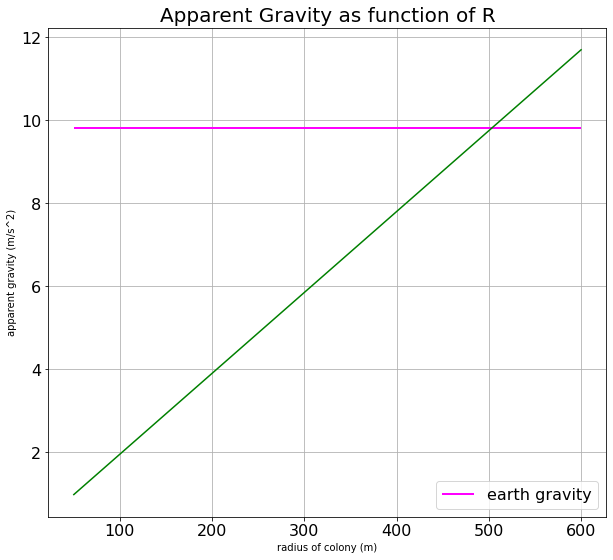

In [72]:
fig1, ax1 = plt.subplots()

# plot the basic projectile model
ax1.plot(range_radii, apparentGravity,
            color = 'green')

# draw a horizontal or vertical line across the plot to show some feature
ax1.hlines(9.81, minRadius, maxRadius,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "earth gravity")

# a more explicit way to set labels
plt.xlabel('radius of colony (m)', fontsize = 10)
plt.ylabel('apparent gravity (m/s^2)', fontsize = 10)
plt.title('Apparent Gravity as function of R', fontsize = 20)

fig1.set_size_inches(10, 9)
ax1.grid()
plt.legend(loc= 4)

plt.show()

### Student Challenges:

Students usually get to this point comfortably but are then unclear how to proceed. The question is how to explore the idea that 20 m off the ground 'gravity' is still at least 95% of normal. Given that we have the calculational tools of python one approach is to just plot the apparent gravity for a radius that is 20 m smaller. I am tempted to ask you to do this from scratch but it feels just a little premature. 

In [73]:
# work out what's happening 20 m off the ground
# need to be careful that the minimum radius is greater than the 20 m
# or there will be a divide by 0 error.
radiiUp = range_radii - 20.
speedUp = 2.*np.pi*radiiUp/period
apparentGravUp = speedUp**2/radiiUp


### Plotting Both:

As usual it helps to plot both situation on the same graph. I had a little hiccup at the begining when I didn't use the outer radius of my space station for the second plot but got that sorted eventually.

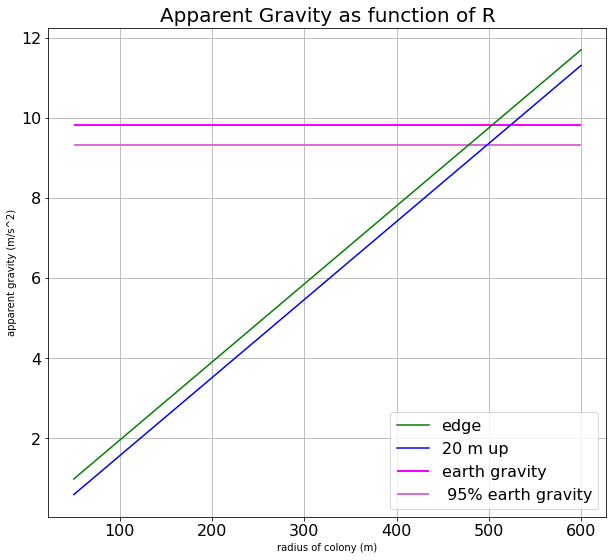

In [74]:
fig2, ax2 = plt.subplots()

# plot the basic projectile model
ax2.plot(range_radii, apparentGravity,
            color = 'green',label = "edge")
ax2.plot(range_radii, apparentGravUp,
            color = 'blue',label = "20 m up")

# draw a horizontal or vertical line across the plot to show some feature
ax2.hlines(9.81, minRadius, maxRadius,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "earth gravity")
ax2.hlines(0.95*9.81, minRadius, maxRadius,
         color = 'orchid', linestyle = '-',
         linewidth = 2., label = " 95% earth gravity")

# a more explicit way to set labels
plt.xlabel('radius of colony (m)', fontsize = 10)
plt.ylabel('apparent gravity (m/s^2)', fontsize = 10)
plt.title('Apparent Gravity as function of R', fontsize = 20)

fig2.set_size_inches(10, 9)
ax2.grid()
plt.legend(loc= 4)

plt.show()

### How to zoom in!

When looking at plots like this we could use math tools or we could just zoom in like you do with your calculator. Here's how that happens....notice the set_xlim and ylim commands. Be aware that if you set your limits so that the plot doesn't exist in that region then you will see nothing -- very disconcerting!

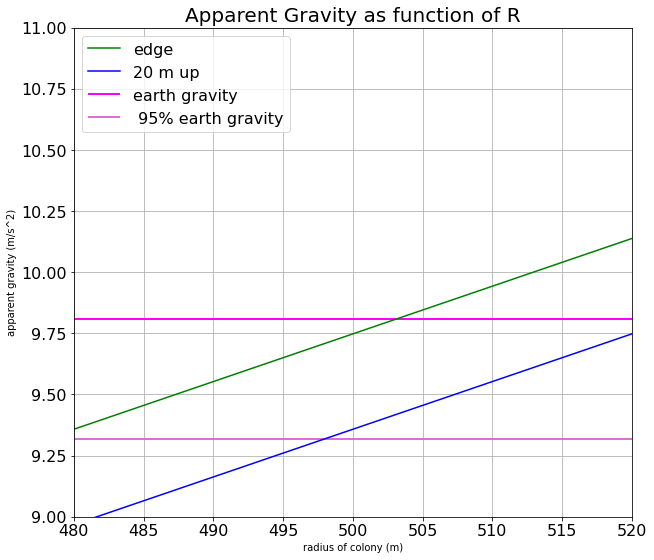

In [71]:
fig3, ax3 = plt.subplots()

# plot the basic projectile model
ax3.plot(range_radii, apparentGravity,
            color = 'green',label = "edge")
ax3.plot(range_radii, apparentGravUp,
            color = 'blue',label = "20 m up")

# draw a horizontal or vertical line across the plot to show some feature
ax3.hlines(9.81, minRadius, maxRadius,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "earth gravity")
ax3.hlines(0.95*9.81, minRadius, maxRadius,
         color = 'orchid', linestyle = '-',
         linewidth = 2., label = " 95% earth gravity")

# a more explicit way to set labels
plt.xlabel('radius of colony (m)', fontsize = 10)
plt.ylabel('apparent gravity (m/s^2)', fontsize = 10)
plt.title('Apparent Gravity as function of R', fontsize = 20)

# zoom in!!
ax3.set_xlim([480,520])
ax3.set_ylim([9,11])

fig3.set_size_inches(10, 9)
ax3.grid()
plt.legend(loc= 2)

plt.show()

### Pick a radius

For the numbers in this notebook you can see that this space station is 503 m in radius where the ground feels earth like (the green line). 20 m above that (the blue line) gravity is still more than 95% of earth so I'm good.

In order to arrive at a maximum width for my space station I need to find the **minimum** radius that still meets the requirement 20 m off the ground. Playing with the plots above will eventually lead me to that solution.


***
## Lab Deliverable:

Show your plot that confirms the minimum radius of the space station that meets criterial 1: and 2:. State, for the record what that minimum radius is.

***

***
## Lab Deliverable:

Now calculate the 'width' of your space station that yields a total surface area that meets criteria 1:. **Be Very Careful!** It is very common to convert $km^2$ to $m^2$ incorrectly. Use appropriate markdown tools to show your calculation and result with appropriate units attached. All of this should be consistent with your illustration at the begining of this notebook. 

***

### Dropped Ball

Describe with clarity what happens to a ball that I let go of as I am standing on the 'ground' in this space station. From the other information you have from this lab calculate the time it takes this 'dropped' ball to hit the 'ground'. How does this compare to a dropped ball on earth? Are there any observable differences?

Remember to do the freebody diagram of the ball after I release it. Given that you know r from your previous exlorations you can figure out the time it takes to get to the 'floor'. You will need to do a separate kinematic calculation to see how long it takes a ball to fall to the floor here on planet earth.

<img src="images/cross-section.jpg" width="600" height="600" />


***
## Lab Deliverable:

Show your calculations and compare the 'drop time' on the space station with the drop time on earth. 

***

### Extensions: 

How many people do you think could live in this space colony? Consider the volume of air, surface area per person, and any other factors you think are relevant. 